In [2]:
!rm -r las_converter/__pycache__/

rm: cannot remove 'las_converter/__pycache__/': No such file or directory


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from las_converter.las_converter import WellLog

In [15]:
log1 = WellLog("/home/dimaswehhh/Downloads/well log data/WA1.LAS")

Loading well data. It will takes time for a while...


In [16]:
log1.get_description()

There are some well properties with description provided.
- version_information
- well_information
- curve_information
- parameter_information
- other_information
- data_table


In [17]:
log1.get_description("version_information")

Describing well log information about 'version_information'
- vers. : CWLS LOG ASCII STANDARD--VERSION 2.0
- wrap. : ONE LINE PER DEPTH STEP


In [20]:
log1.get_description("well_information")

Describing well log information about 'well_information'
- strt.ft : START DEPTH
- stop.ft : STOP DEPTH
- step.ft : STEP
- null. : NULL VALUE
- comp. : COMPANY
- well. : WELL NAME
- uwi. : WELL UWI
- api. : WELL API
- loc. : WELL LOCATION
- date. : WELL DATE
- fld. : Project NAME


In [27]:
log1.get_description("curve_information")

Describing well log information about 'curve_information'
- m__depth.ft : M__DEPTH
- sp : SP
- gr : GR
- cali : CALI
- bitsize : BitSize
- ll8 : LL8
- ilm : ILM
- ild : ILD
- rhob : RHOB
- nphi : NPHI
- dt : DT
- mudwgt : MudWgt


In [21]:
# # manual print for getting well log description
# for i, j in log1.info["description"].items():
#     print(i)
    
#     for k, l in j.items():
#         print(k, l)
        
#     print()

In [22]:
# for i, j in log1.info["version_information"].items():
#     print(i, j)

In [23]:
# for i, j in log1.info["well_information_block"].items():
#     print(i, j)

In [26]:
# for i in log1.info["curve_information"]:
#     print(i)

In [28]:
log_data = log1.info["data_table"]

print(log_data["m__depth.ft"])
print(log_data["gr"][:10])

[ 101.   101.5  102.  ... 3665.  3665.5 3666. ]
[None None None None 34.3222 37.763 45.5851 48.7654 51.1488 53.5446]


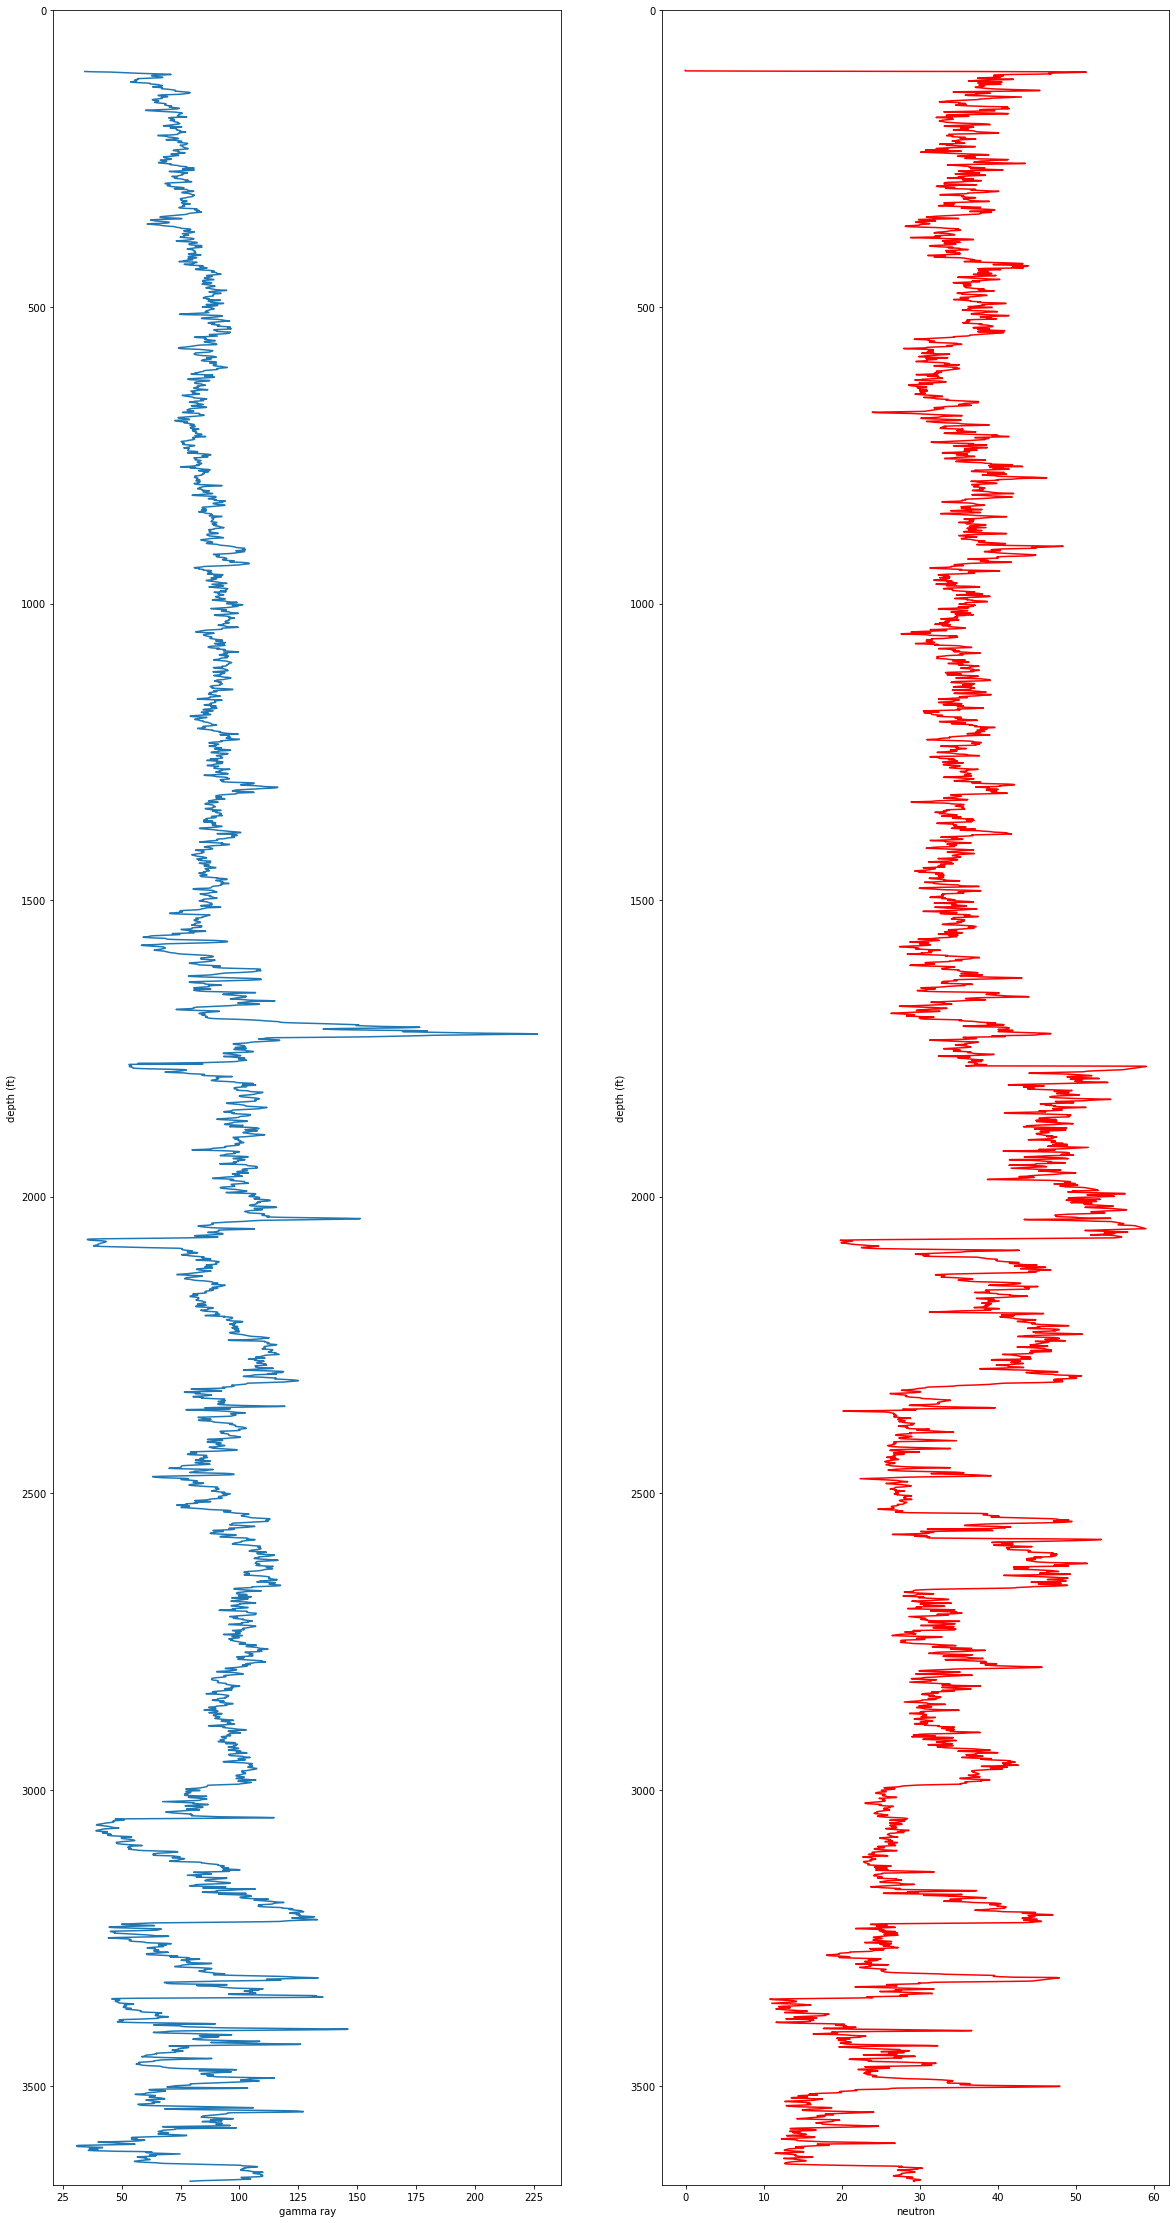

In [31]:
fig = plt.figure(figsize=(20, 40))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel("gamma ray")
ax2.set_xlabel("neutron")

ax1.set_ylabel("depth (ft)")
ax2.set_ylabel("depth (ft)")

ax1.plot(np.array(log_data["gr"]), np.array(log_data["m__depth.ft"]))
ax2.plot(np.array(log_data["nphi"]), np.array(log_data["m__depth.ft"]), color="red")

ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
ax2.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
plt.show()

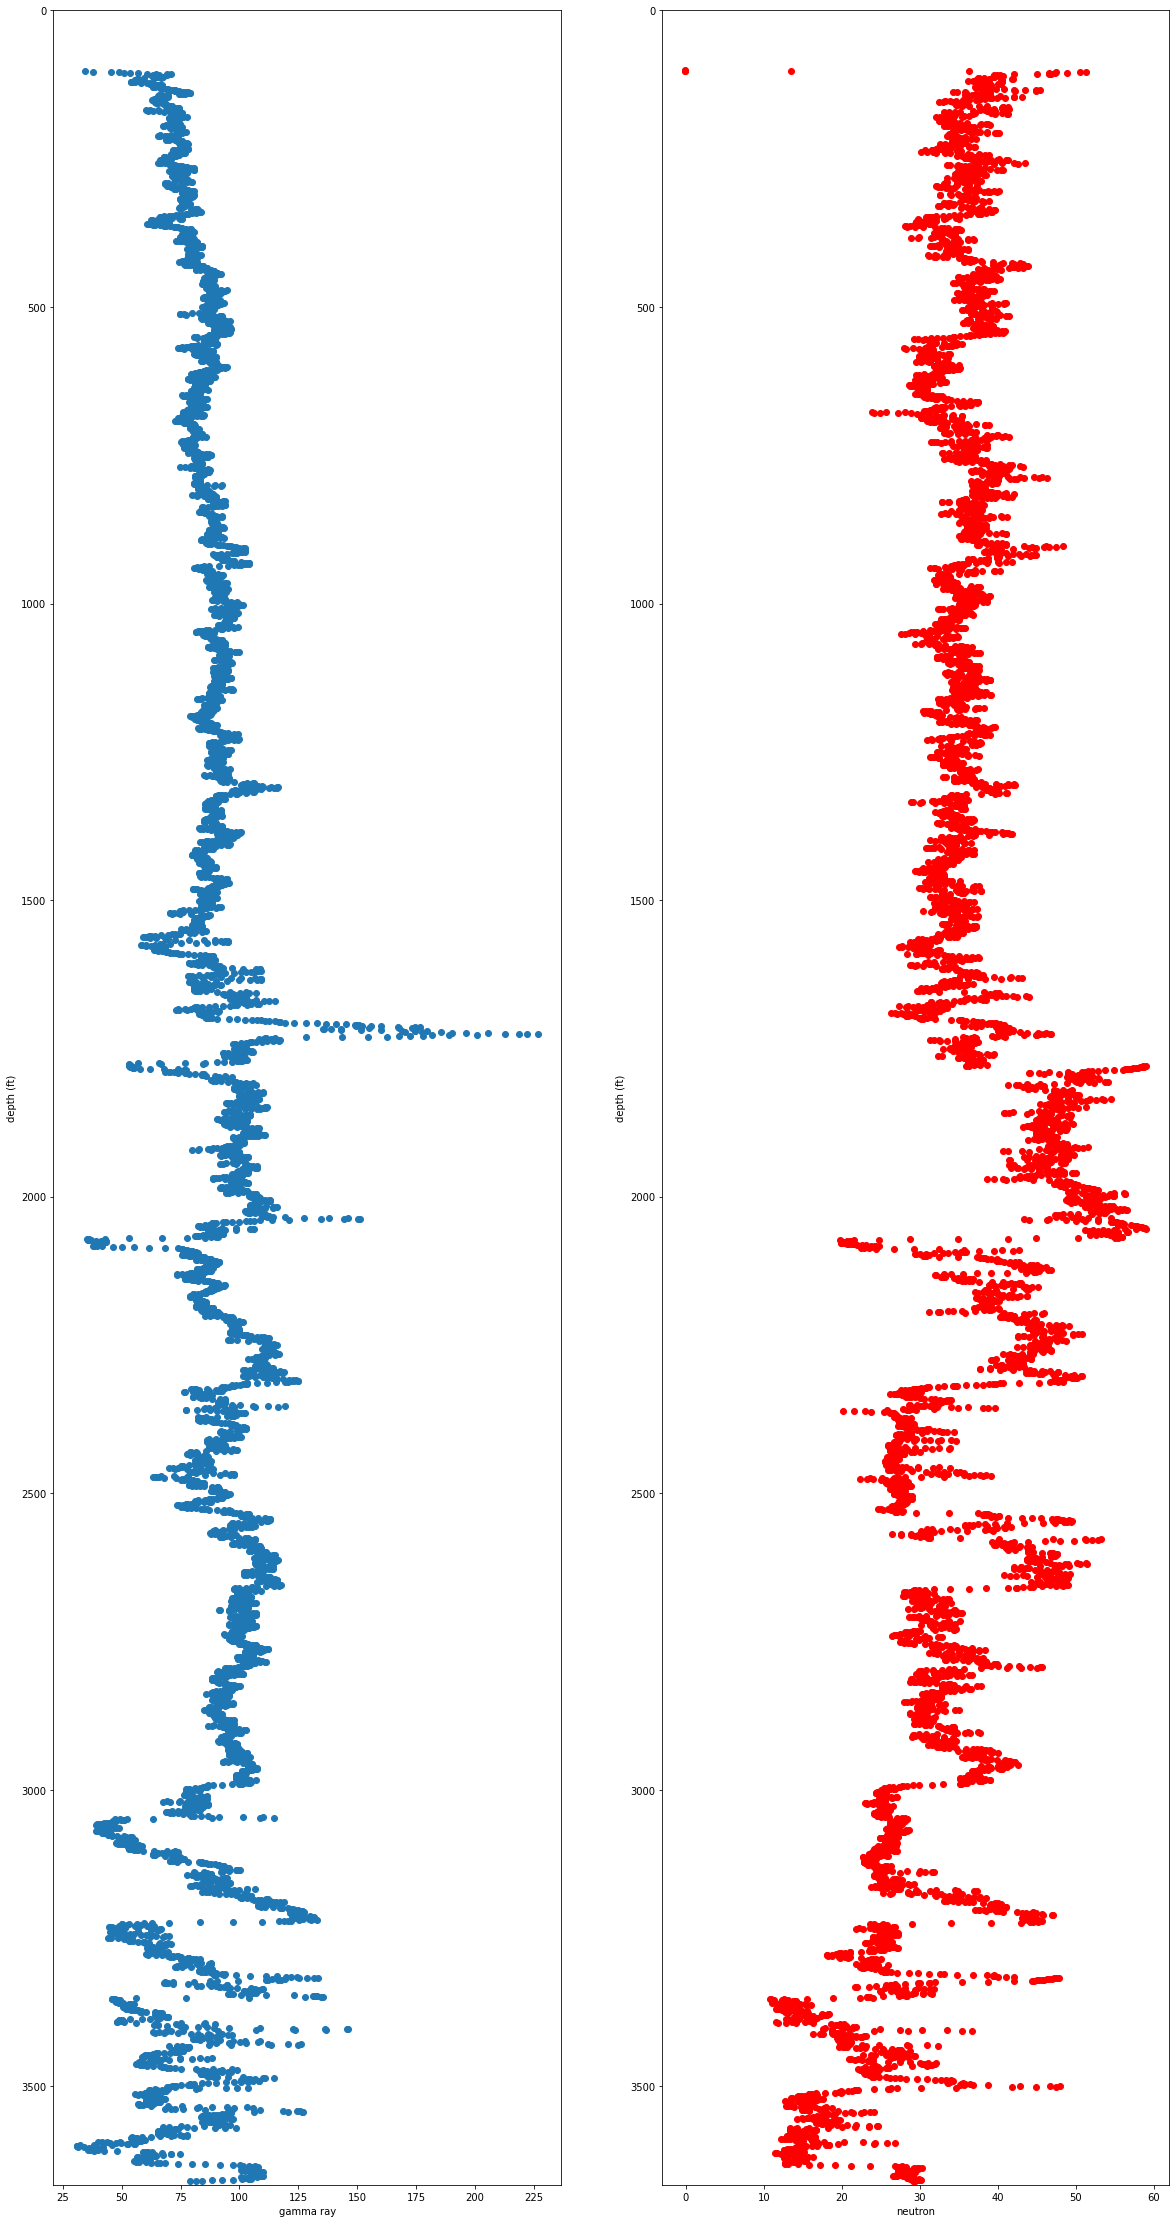

In [32]:
fig = plt.figure(figsize=(20, 40))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel("gamma ray")
ax2.set_xlabel("neutron")

ax1.set_ylabel("depth (ft)")
ax2.set_ylabel("depth (ft)")

ax1.scatter(np.array(log_data["gr"]), np.array(log_data["m__depth.ft"]))
ax2.scatter(np.array(log_data["nphi"]), np.array(log_data["m__depth.ft"]), color="red")

ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
ax2.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
plt.show()

In [33]:
help(WellLog)

Help on class WellLog in module las_converter.las_converter:

class WellLog(builtins.object)
 |  Defines well log database with LAS file input.
 |   
 |    parameter input(s):
 |      - file (str)
 |        Specifies LAS file inputted for process well log data.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, file)
 |      Initiate well log instance
 |  
 |  get_description(self, section=None)
 |      Get the loaded well log data description
 |      
 |        parameter input(s):
 |          - section (str)
 |            Get the well log information based on section input
 |            Return list of sections input provided if section is not given
 |            Default value = None
 |      
 |        output(s)
 |          - list of sections input provided (if section == None)
 |          - list of section properties based on section input given
 |  
 |  load_data(self)
 |      Load data from LAS file.
 |      
 |        additional notes:
 |          The function will be executed 

In [45]:
import json

for i, j in log1.info["data_table"].items():
    log1.info["data_table"][i] = list(j)

with open('well.json', 'w') as json_file:
  json.dump(log1.info, json_file)

In [44]:
print(log1.file.filename)

AttributeError: 'list' object has no attribute 'filename'